The imports

In [1]:
import numpy
import pandas as pd
import yfinance as yf
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

Outputting the price table of a certain stock, which is currently Apple

In [2]:
stock = 'AAPL'

data_for_stock = yf.Ticker(stock)
data_for_stock = data_for_stock.history(period="10y")

del data_for_stock["Dividends"]
data_for_stock["Tomorrow"] = data_for_stock["Close"].shift(-1)
data_for_stock["Target"] = (data_for_stock["Tomorrow"] > data_for_stock["Close"]).astype(int)

data_for_stock

,Open,High,Low,Close,Volume,Stock Splits,Tomorrow,Target
Date,,,,,,,,
2013-10-17 00:00:00-04:00,15.584217,15.733831,15.574866,15.725103,253593200,0.0,15.861938,1
2013-10-18 00:00:00-04:00,15.771547,15.873471,15.762819,15.861938,290542000,0.0,16.250622,1
2013-10-21 00:00:00-04:00,15.951704,16.342260,15.943912,16.250622,398106800,0.0,16.204189,0
2013-10-22 00:00:00-04:00,16.408040,16.471626,15.835140,16.204189,534063600,0.0,16.362837,1
2013-10-23 00:00:00-04:00,16.177065,16.384968,16.177065,16.362837,313723200,0.0,16.579470,1
...,...,...,...,...,...,...,...,...
2023-10-10 00:00:00-04:00,178.100006,179.720001,177.949997,178.389999,43698000,0.0,179.800003,1
2023-10-11 00:00:00-04:00,178.199997,179.850006,177.600006,179.800003,47551100,0.0,180.710007,1
2023-10-12 00:00:00-04:00,180.070007,182.339996,179.039993,180.710007,56743100,0.0,178.850006,0


The below is to plot the stocks over time.

Text(0.5, 1.0, 'The Stock Price')

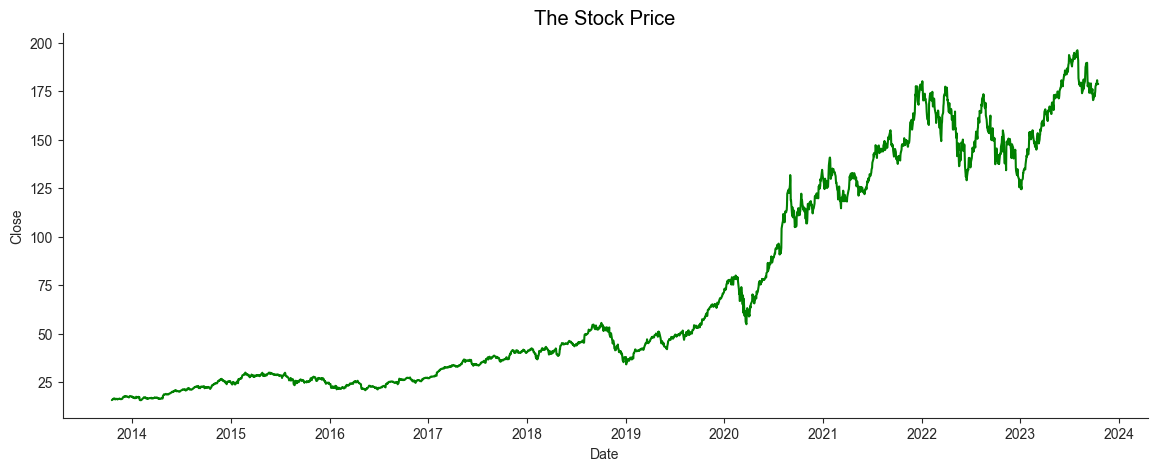

In [3]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=data_for_stock,x="Date",y='Close',color='green')
sns.despine()
plt.title("The Stock Price",size='x-large',color='black')

Creating the training and testing data

In [4]:
import sklearn

37


Text(0.5, 1.0, 'The Training Data')

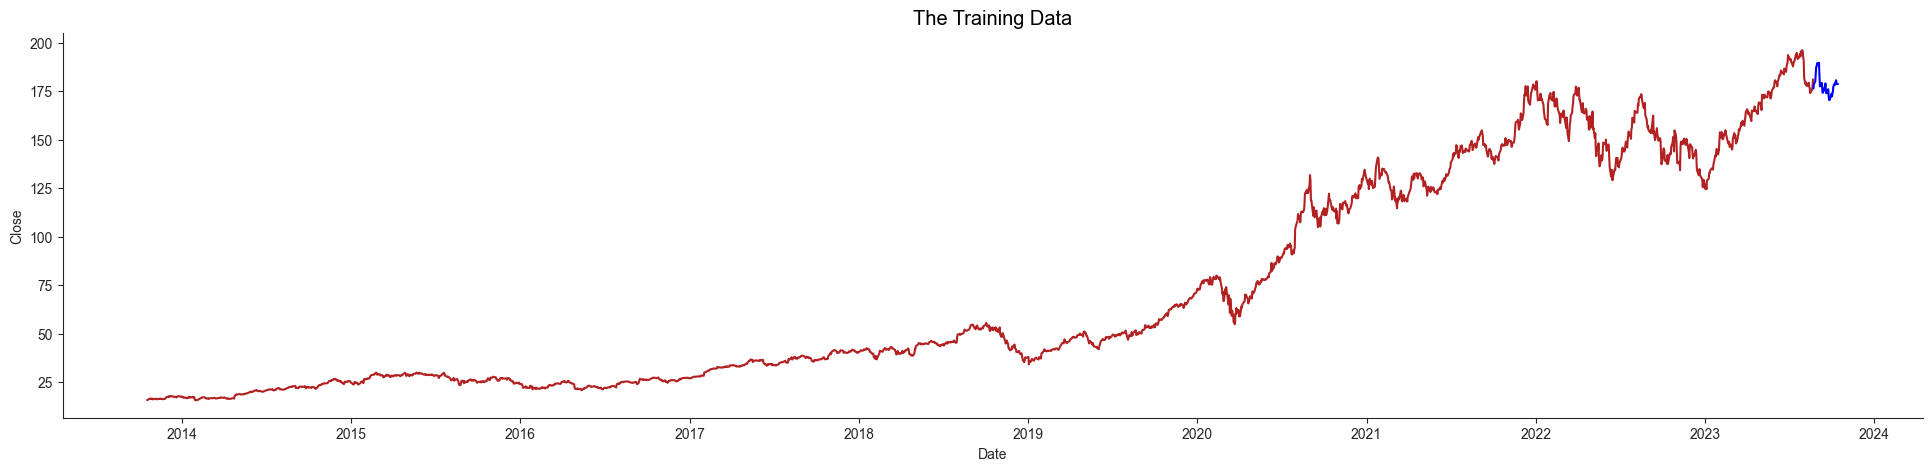

In [5]:
testing_percentage = 0.015
train_d = data_for_stock[:int(-1*len(data_for_stock)*(testing_percentage))]
test_d = data_for_stock[int(-1*len(data_for_stock)*testing_percentage):]

print(len(test_d))

plt.figure(figsize=(24,5))
sns.set_style("ticks")
sns.lineplot(data=train_d,x="Date",y='Close',color='firebrick')
sns.lineplot(data=test_d,x="Date", y='Close', color='blue')
sns.despine()
plt.title("The Training Data",size='x-large',color='black')

In [6]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=150, min_samples_split=150, random_state=1)
predictors = ["Close", "Open", "High", "Low", "Volume"]
model.fit(train_d[predictors], train_d["Target"])

RandomForestClassifier(min_samples_split=150, n_estimators=150, random_state=1)

In [7]:
from sklearn.metrics import precision_score

predictions = model.predict(test_d[predictors])
predictions = pd.Series(predictions, index=test_d.index)
# for p in predictions:
#     print(p)
precision_score(test_d["Target"], predictions)

0.75